#### Example of Regression Analysis Using the Boston Housing Data Set.

In [2]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl


C:\Users\yuguangyang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.data.shape)
print(boston.target.shape)

(506L, 13L)
(506L,)


In [6]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)

In [10]:
print(boston.data)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


In [11]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [9]:
# First 10 elements of the data
print(x[:10])

[[   0.01   18.      2.31    0.      0.54    6.58   65.2     4.09    1.    296.     15.3   396.9     4.98    1.  ]
 [   0.03    0.      7.07    0.      0.47    6.42   78.9     4.97    2.    242.     17.8   396.9     9.14    1.  ]
 [   0.03    0.      7.07    0.      0.47    7.18   61.1     4.97    2.    242.     17.8   392.83    4.03    1.  ]
 [   0.03    0.      2.18    0.      0.46    7.     45.8     6.06    3.    222.     18.7   394.63    2.94    1.  ]
 [   0.07    0.      2.18    0.      0.46    7.15   54.2     6.06    3.    222.     18.7   396.9     5.33    1.  ]
 [   0.03    0.      2.18    0.      0.46    6.43   58.7     6.06    3.    222.     18.7   394.12    5.21    1.  ]
 [   0.09   12.5     7.87    0.      0.52    6.01   66.6     5.56    5.    311.     15.2   395.6    12.43    1.  ]
 [   0.14   12.5     7.87    0.      0.52    6.17   96.1     5.95    5.    311.     15.2   396.9    19.15    1.  ]
 [   0.21   12.5     7.87    0.      0.52    5.63  100.      6.08    5.    311. 

In [12]:
# First 10 elements of the response variable
print(y[:10])

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [16]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Let's see predictions for the first 10 instances
print(linreg.predict(x[:10]))

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232
  25.25940048  23.00433994  19.5347558   11.51696539  18.91981483]


In [18]:
# Compute RMSE on training data
yhat = linreg.predict(x)

# Now we can constuct a vector of errors
err = abs(yhat-y)

# Let's see the error on the first 10 predictions
print(err[:10])

[ 6.00821269  3.4298606   4.1297683   4.79185945  8.25711768  3.44059952
  0.10433994  7.5652442   4.98303461  0.01981483]


In [20]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(y))
print(rmse_train)

4.67950630064


In [21]:
# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01   0.00000000e+00]


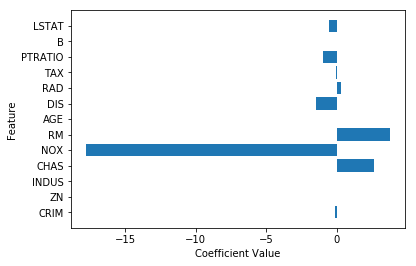

In [22]:
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_[:-1], align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(boston.feature_names), boston.feature_names)

In [23]:
print(linreg.intercept_)

36.4911032804


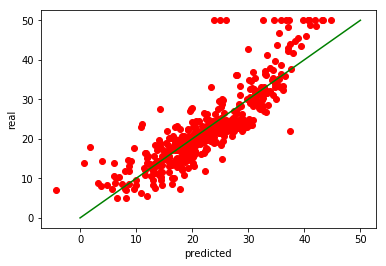

In [25]:
# Plot outputs
%matplotlib inline
pl.plot(yhat, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


In [28]:
# Now let's compute RMSE using 10-fold x-validation
n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n
kf

sklearn.cross_validation.KFold(n=506, n_folds=10, shuffle=False, random_state=None)

In [22]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.1856


#### Let's try Ridge Regression:

In [23]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
# Compute RMSE on training data
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation

n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 4.6857
RMSE on 10-fold CV: 4.3434


#### We can try different values of alpha and observe the impact on x-validation RMSE

In [25]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.6795		 5.1835
0.418	 4.6842		 5.1291
0.826	 4.6921		 5.1056
1.234	 4.7000		 5.0938
1.642	 4.7070		 5.0871
2.050	 4.7133		 5.0829
2.458	 4.7187		 5.0800
2.866	 4.7234		 5.0778
3.274	 4.7276		 5.0761
3.682	 4.7313		 5.0747
4.090	 4.7346		 5.0734
4.498	 4.7375		 5.0722
4.906	 4.7402		 5.0710
5.313	 4.7426		 5.0700
5.721	 4.7448		 5.0689
6.129	 4.7469		 5.0679
6.537	 4.7488		 5.0669
6.945	 4.7505		 5.0659
7.353	 4.7522		 5.0650
7.761	 4.7537		 5.0640
8.169	 4.7552		 5.0631
8.577	 4.7565		 5.0622
8.985	 4.7578		 5.0613
9.393	 4.7591		 5.0604
9.801	 4.7603		 5.0595
10.209	 4.7614		 5.0587
10.617	 4.7625		 5.0578
11.025	 4.7635		 5.0570
11.433	 4.7646		 5.0562
11.841	 4.7655		 5.0554
12.249	 4.7665		 5.0546
12.657	 4.7674		 5.0538
13.065	 4.7683		 5.0531
13.473	 4.7692		 5.0523
13.881	 4.7700		 5.0516
14.289	 4.7708		 5.0509
14.697	 4.7717		 5.0502
15.104	 4.7724		 5.0495
15.512	 4.7732		 5.0488
15.920	 4.7740		 5.0482
16.328	 4.7747		 5

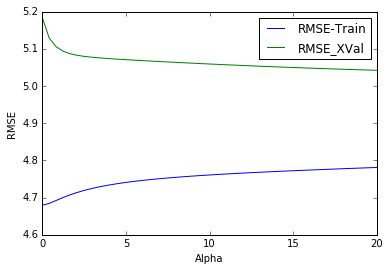

In [26]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

#### To make comparisons across methods easier, let's parametrize the regression methods:

In [27]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print "\n"

Method: linear regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.8819


Method: lasso
RMSE on training: 4.8570
RMSE on 10-fold CV: 5.7675


Method: ridge
RMSE on training: 4.6822
RMSE on 10-fold CV: 5.8535


Method: elastic-net
RMSE on training: 4.9072
RMSE on 10-fold CV: 5.4936




#### Now let's try to do regression via Stochastic Gradient Descent.

In [28]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, n_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 4.7638
RMSE on 10-fold CV: 5.6160


#### Using the regression implementation from Machine Learning in Action, Chapter 8:

In [29]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [30]:
w = standRegres(x,y)

In [31]:
print w

[[ -0.11]
 [  0.05]
 [  0.02]
 [  2.69]
 [-17.8 ]
 [  3.8 ]
 [  0.  ]
 [ -1.48]
 [  0.31]
 [ -0.01]
 [ -0.95]
 [  0.01]
 [ -0.53]
 [ 36.49]]


In [32]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [33]:
w_ridge = ridgeRegres(x,y,0.5)
print w_ridge

[[ -0.1 ]
 [  0.05]
 [ -0.  ]
 [  2.68]
 [ -9.55]
 [  4.55]
 [ -0.  ]
 [ -1.26]
 [  0.25]
 [ -0.01]
 [ -0.73]
 [  0.01]
 [ -0.49]
 [ 21.78]]


#### Now that we have the regression coefficients, we can compute the predictions:

In [34]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

In [35]:
yHat.shape

(506L, 1L)

In [36]:
print yHat[0:10]

[[ 29.81]
 [ 24.75]
 [ 30.78]
 [ 29.12]
 [ 28.61]
 [ 25.35]
 [ 22.48]
 [ 19.28]
 [ 11.21]
 [ 18.65]]


In [37]:
print yMat.T[0:10]

[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]
 [ 28.7]
 [ 22.9]
 [ 27.1]
 [ 16.5]
 [ 18.9]]


#### Model evaluation and cross validation can be performed as before.

In [38]:
yHat.A.ravel()

array([ 29.81,  24.75,  30.78,  29.12,  28.61,  25.35,  22.48,  19.28,  11.21,  18.65,  19.03,  21.15,  20.51,  20.15,
        19.84,  19.8 ,  21.17,  17.52,  16.22,  18.68,  12.82,  18.15,  16.6 ,  14.34,  16.27,  13.61,  15.97,  15.28,
        20.45,  21.86,  11.99,  18.54,   9.43,  14.57,  14.1 ,  23.35,  21.87,  22.83,  22.8 ,  31.37,  34.5 ,  28.21,
        24.95,  24.47,  22.57,  21.38,  19.91,  17.7 ,   8.69,  16.69,  20.87,  23.44,  27.52,  23.63,  16.1 ,  32.02,
        25.3 ,  32.9 ,  22.18,  21.13,  17.87,  18.44,  24.3 ,  23.48,  24.42,  29.71,  24.62,  20.81,  16.99,  20.45,
        24.99,  21.23,  24.06,  23.72,  25.05,  23.41,  22.21,  22.65,  20.85,  21.65,  28.49,  26.86,  25.86,  24.72,
        24.63,  27.58,  21.78,  25.22,  30.6 ,  30.94,  26.74,  26.97,  28.33,  28.37,  26.23,  28.09,  24.01,  36.23,
        35.56,  32.35,  25.09,  26.15,  19.35,  20.46,  21.48,  18.39,  17.15,  20.78,  22.89,  19.99,  21.01,  26.49,
        20.21,  20.34,  24.68,  19.8 ,  23.06,  

In [39]:
yHat.A.shape

(506L, 1L)